<a href="https://colab.research.google.com/github/PinkHedgehog/PSAD/blob/main/PSAD_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install permute
!pip install permutation_test
!pip install cryptorandom
!pip install arch

     |████████████████████████████████| 153kB 8.1MB/s 
  Created wheel for permutation-test: filename=permutation_test-0.18-cp36-none-any.whl size=17050 sha256=bf72f549fea050bb8c411cd713ac4f001aac97c727f2ece52858954f603a9391
  Stored in directory: /root/.cache/pip/wheels/4b/c4/06/f648bab9c8da5c61a4d5ff4b8f2ccdea7718aaac84708142b2
Successfully built permutation-test
     |████████████████████████████████| 870kB 8.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arch: filename=arch-4.16.1-cp36-cp36m-linux_x86_64.whl size=1179494 sha256=b00dd2a9d032978f3803fff016d9f3ec7fff783191e78af04dc73ca95180f2bf
  Stored in directory: /root/.cache/pip/wheels/a9/99/58/8fb4c930bff0a8c4deff117a09a7de19c2001099298976fbb1
Successfully built arch


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.descriptivestats import sign_test

import seaborn as sns
from permutation_test import permutationtest

# перестановочный критерий
from permute.core import one_sample, two_sample

# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# для перестановок
import itertools

# бутстрап
from arch.bootstrap import IIDBootstrap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!wget 'https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem3/ivanov.as%40phystech.edu.csv'
data = pd.read_csv('ivanov.as@phystech.edu.csv', index_col=False, sep='\n', header=None, names=['main'])

--2021-02-22 19:45:11--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem3/ivanov.as%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507 [text/plain]
Saving to: ‘ivanov.as@phystech.edu.csv’

ivanov.as@phystech. 100%[===================>]     507  --.-KB/s    in 0s      

2021-02-22 19:45:11 (18.9 MB/s) - ‘ivanov.as@phystech.edu.csv’ saved [507/507]



In [7]:
x = data['main'].to_numpy()
x

array([ 0.3420223 ,  0.52040325,  0.68021049,  2.25186405, -0.67461519,
        1.05275691,  0.07581489,  1.28951735,  0.82613319,  1.28261662,
       -1.01276512,  0.70099388, -2.12149084,  2.23327602, -1.10941478,
       -0.07106067,  1.47503218, -1.5392323 , -0.64438543,  0.18661226])

(array([1., 1., 2., 2., 1., 3., 4., 3., 1., 2.]),
 array([-2.12149084, -1.68415535, -1.24681986, -0.80948437, -0.37214889,
         0.0651866 ,  0.50252209,  0.93985758,  1.37719307,  1.81452856,
         2.25186405]),
 <a list of 10 Patch objects>)

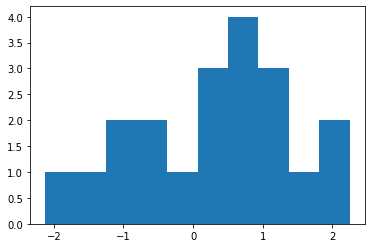

In [8]:
plt.hist(x)

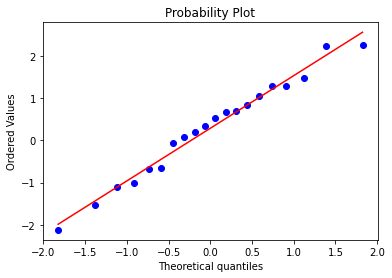

In [9]:
_ = st.probplot(x, plot=plt)

In [11]:
2 ** 20

1048576

In [12]:
t = (x - 0.5)
T = np.sum(t)
T

-4.2557109441251875

In [13]:
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=20):
    count +=1
    stat = np.dot(t, v)
    if abs(stat)>=abs(T):
        good+=1
    
        
print(good/count)
print(count)

0.4337444305419922
1048576


In [14]:
print(good)

454814


In [15]:
bs = IIDBootstrap(x)
bs.conf_int(np.mean, 1000, method='basic')

array([[-0.20822621],
       [ 0.82201931]])

In [17]:
rs = np.random.RandomState(0)

idx = rs.randint(low=0, high=20, size=(1000, len(data)))
results_median = []
results_mean = []
for i in idx:
    sample = x[i]
    results_mean.append(np.mean(sample))
    results_median.append(np.median(sample))

display(np.percentile(results_mean, [2.5, 97.5]))
display(np.percentile(results_median, [2.5, 97.5]))

array([-0.21841101,  0.81078859])

array([-0.35772305,  1.05275691])

In [19]:
sign_test(x)

(3.0, 0.2631759643554687)

In [20]:
st.wilcoxon(x)

WilcoxonResult(statistic=73.0, pvalue=0.23222559205012872)